In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

*We are using Python to prepare and process the data.*

**Preparing the Environment**
The numPy, pandas, matplotlib, datetime packages are installed and aliased for easy reading.

In [2]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import datetime as dt # for datetime values
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Importing data set**

Reading in the selected file.

In [3]:
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv')

**Data cleaning and manipulation**
Check for null or missing values

Previewing using head function to show the first 10 rows of daily_activity to familiarise with the data

In [4]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


**Let's focus on the dependent variables (like: 'ActivityDate', 'TotalDistance') and try to know a little bit more about our df. Then, finding out whether there is any null or missing values in our dataframe**

In [5]:
# obtain the # of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
df['Id'].nunique()

35

**Another method to get unique values:**

In [7]:
len(df['Id'].unique())

35

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

**To change the data type and clm name for 'ActivityDate'. 'ActivityDate' format to yyyy-mm-dd and this column name to 'Date'**

In [9]:
#To change the column name
df.rename(columns={'ActivityDate':'Date'},inplace=True)

In [10]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# re-print information to confirm
df.info()

# print the first 5 rows of "Date" to confirm
df["Date"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   Date                      457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-03-25
1   2016-03-26
2   2016-03-27
3   2016-03-28
4   2016-03-29
Name: Date, dtype: datetime64[ns]

In [11]:
# Define a new Column that contain the Day of week
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday


**Let's find out total minutes and convert it into total hours**

In [12]:
df['Total_minutes'] = df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df['LightlyActiveMinutes']+df['SedentaryMinutes']

df['Total_hours'] = np.round(df['Total_minutes']/60)
df.head(10)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Total_minutes,Total_hours
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,1054,18.0
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday,968,16.0
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday,934,16.0
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday,1363,23.0
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday,1062,18.0
5,1503960366,2016-03-30,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,Wednesday,1440,24.0
6,1503960366,2016-03-31,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,Thursday,1104,18.0
7,1503960366,2016-04-01,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,Friday,1134,19.0
8,1503960366,2016-04-02,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,Saturday,931,16.0
9,1503960366,2016-04-03,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,Sunday,1014,17.0


In [13]:
df.duplicated().sum()

0

**Data Visualization and findings:**

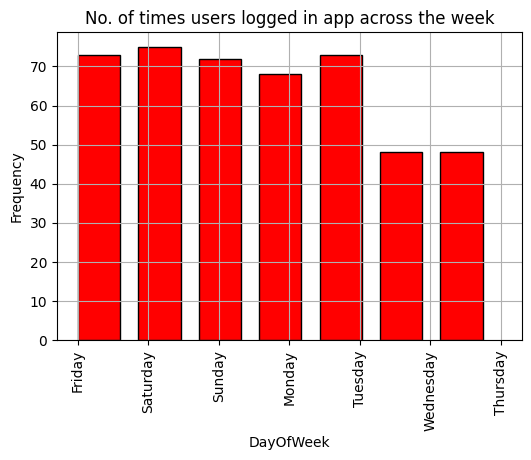

In [14]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.DayOfWeek, bins = 7, color='r', width = 0.6, edgecolor = "black")

# adding annotations and visuals
plt.xlabel("DayOfWeek")
plt.ylabel("Frequency")

plt.title("No. of times users logged in app across the week")
plt.xticks(rotation = 'vertical')

plt.grid(True)
plt.show()

**Frequency of usage across the week**
In this histogram, we are looking at the frequency of FitBit app usage in terms of days of the week.

We can see that mostly on Wednesday and Thursday, people tend to not log on to the app.

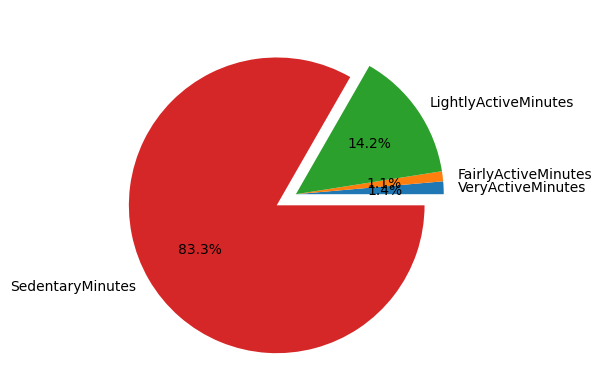

In [15]:
#Plotting a pie chart showing the distribution of active minutes

minutes = [df.VeryActiveMinutes.sum(),df.FairlyActiveMinutes.sum(),df.LightlyActiveMinutes.sum(),df.SedentaryMinutes.sum()]
labels = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

plt.pie(minutes,labels=labels,autopct='%1.1f%%',explode=[0,0,0,0.15])

plt.show()

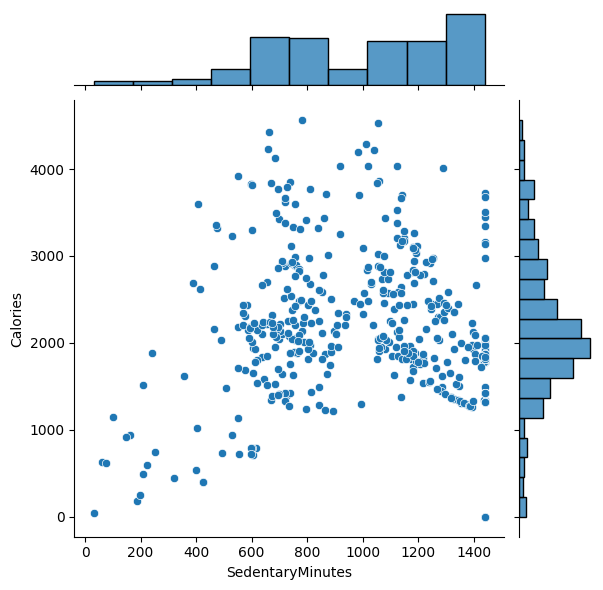

In [16]:
#We can notice sedentary minutes are 83% of the total minutes. Finding relationship between SedentaryMinutes and total Calories burn
sns.jointplot(x='SedentaryMinutes',y='Calories',data = df)

In [17]:
#Applying correlation on our quantitative data
df_corr = df.drop(['Date', 'DayOfWeek','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes'],axis=1)
df_corr.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,Calories,Total_minutes,Total_hours
Id,1.000000,0.138662,0.185495,0.177983,0.191242,0.290048,0.032029,0.015666,-0.019149,0.290868,-0.029175,-0.030675
TotalSteps,0.138662,1.000000,0.986789,0.982997,0.146380,0.733689,0.541838,0.775562,0.081965,0.581380,0.041449,0.042639
TotalDistance,0.185495,0.986789,1.000000,0.995122,0.164312,0.791778,0.515128,0.744812,0.080787,0.613647,0.053311,0.054483
TrackerDistance,0.177983,0.982997,0.995122,1.000000,0.094890,0.789353,0.516099,0.737570,0.077461,0.612066,0.049276,0.050529
LoggedActivitiesDistance,0.191242,0.146380,0.164312,0.094890,1.000000,0.154754,0.060123,0.115671,0.091091,0.148740,-0.000918,-0.000657
VeryActiveDistance,0.290048,0.733689,0.791778,0.789353,0.154754,1.000000,0.240440,0.264580,0.044666,0.434133,0.076645,0.077098
ModeratelyActiveDistance,0.032029,0.541838,0.515128,0.516099,0.060123,0.240440,1.000000,0.326959,0.016350,0.300781,-0.061373,-0.062010
LightActiveDistance,0.015666,0.775562,0.744812,0.737570,0.115671,0.264580,0.326959,1.000000,0.069051,0.451239,0.003517,0.005734
SedentaryActiveDistance,-0.019149,0.081965,0.080787,0.077461,0.091091,0.044666,0.016350,0.069051,1.000000,0.096874,0.093079,0.092814
Calories,0.290868,0.581380,0.613647,0.612066,0.148740,0.434133,0.300781,0.451239,0.096874,1.000000,0.251934,0.254466


<Axes: >

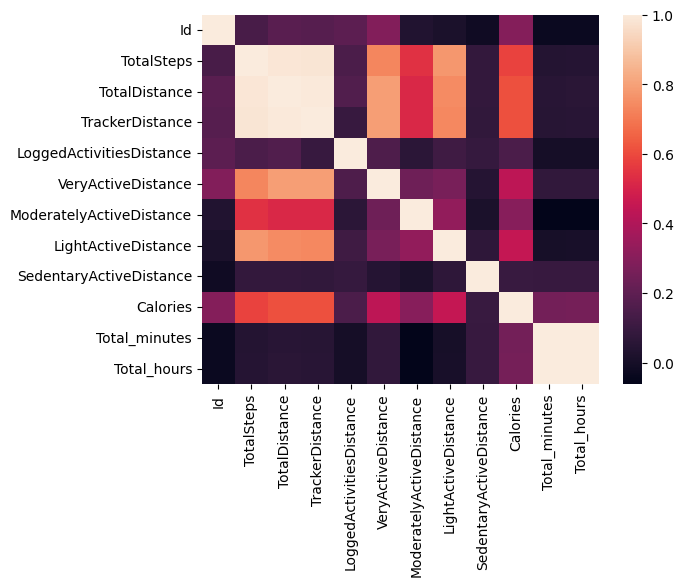

In [18]:
sns.heatmap(df_corr.corr())